
# Analyzing Residential Single Family Properties

## The Question / Problem

You have been hired as an indepedent auditor by Colorado’s Boulder County Assessors Office to help with the following problems.

### Problem 1: Annual Report Insights

The Accessors Office is set to release their annual report on the valuation of residential single family properties.  They have asked you to explore the data and produce at least 2 key findings they can share in their annual report to the public.


### Problem 2: Estimate Home Values

The Assessors Office needs help improving their valuation process for residential single family properties.  They have asked you to write a KNN alogorithm to value new homes based on similar home sales.  By law, residential properties must be valued by using a "market approach". This predicts the price a property would bring on the open market in a transaction between a willing, informed, and knowledgeable buyer and seller.  A property can be valued through the process of analyzing comparable sales.  A comparable sale is any qualified sale in the last 5 years (January 2015 - December 2020).

The central factors used by the Assessors for property valuation are:

- Location
- Living Area (SQFT)
- Age of the Home
- Finished Basement

### Problem 3: Ethics Review
Fairness and accuracy are vitally important.  If the assessed values are too high, the property owners will overpay in taxes.  If the assessed values are too low then we may fall short of the capital needed to cover the budget approved by legislators.  As such, thinking through the impact of how we predict home prices is vitial.

## Problem 1: EDA for the Annual Report Insights

### Goal
Perform EDA on the property valuations for "1-Story" and "2-3 Story" single family residential buildings.  Identify at least 2 key insights and/or graphs that tell a story about the valuations for these properties for the annual report.

### 1.0 Get the Data

Tasks:
1. Read in the following data:
    - buildings.csv
    - land.csv
    - values.csv
    - owner_addresses.csv
2. Adjust the structure of our data as necessary (joins, drop unneeded columns, add features, etc).
3. Inspect and handle missing values as necessary.


In [ ]:
# Your Code Here

import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)

buildings = pd.read_csv('buildings.csv')
land = pd.read_csv('land.csv')
values = pd.read_csv('values.csv')
addresses = pd.read_csv('owner_address.csv')

In [ ]:
buildings.head()
len(buildings)
len(buildings.strap.unique())

,strap,bld_num,section_num,designCode,designCodeDscr,qualityCode,qualityCodeDscr,bldgClass,bldgClassDscr,ConstCode,ConstCodeDscr,builtYear,CompCode,EffectiveYear,bsmtSF,bsmtType,bsmtTypeDscr,carStorageSF,carStorageType,carStorageTypeDscr,nbrBedRoom,nbrRoomsNobath,mainfloorSF,nbrThreeQtrBaths,nbrFullBaths,nbrHalfBaths,TotalFinishedSF,Ac,AcDscr,Heating,HeatingDscr,ExtWallPrim,ExtWallDscrPrim,ExtWallSec,ExtWallDscrSec,IntWall,IntWallDscr,Roof_Cover,Roof_CoverDscr,Stories,UnitCount,status_cd
0,R0000005,1,1,10,1 Story - Ranch,30,AVERAGE,1212,SINGLE FAM RES IMPROVEMENTS,320,Masonry,1957,1.0,1957,988,BWF,WALK-OUT BASEMENT FINISHED AREA,294,GRA,ATTACHED GARAGE AREA,3.0,6.0,1282,0.0,1.0,1.0,1282,NaN,NaN,830.0,Hot Water,40.0,Brick Veneer,NaN,NaN,1130.0,Drywall,1210.0,Asphalt,NaN,NaN,A
1,R0000006,1,1,20,2-3 Story,32,AVERAGE ++,1212,SINGLE FAM RES IMPROVEMENTS,310,Frame,1925,1.0,1985,0,0,0,0,0,0,3.0,8.0,1428,0.0,2.0,1.0,2130,NaN,NaN,810.0,Forced Air,10.0,Frame Wood/Shake,NaN,NaN,1120.0,Plaster,1210.0,Asphalt,NaN,NaN,A
2,R0000008,1,1,10,1 Story - Ranch,31,AVERAGE +,1212,SINGLE FAM RES IMPROVEMENTS,320,Masonry,1954,1.0,1954,0,0,0,0,0,0,3.0,5.0,1558,0.0,1.0,1.0,1558,NaN,NaN,830.0,Hot Water,40.0,Brick Veneer,NaN,NaN,1130.0,Drywall,1210.0,Asphalt,NaN,NaN,A
3,R0000009,1,1,10,1 Story - Ranch,50,VERY GOOD,1212,SINGLE FAM RES IMPROVEMENTS,320,Masonry,1964,1.0,1995,1380,BWF,WALK-OUT BASEMENT FINISHED AREA,808,GRA,ATTACHED GARAGE AREA,4.0,9.0,1604,1.0,2.0,1.0,1604,NaN,NaN,810.0,Forced Air,100.0,Moss Rock/Flagstone,520.0,Frame Stucco,1130.0,Drywall,1290.0,Tar and Gravel,NaN,NaN,A
4,R0000013,1,1,10,1 Story - Ranch,50,VERY GOOD,1212,SINGLE FAM RES IMPROVEMENTS,320,Masonry,1973,1.0,1995,525,BSU,SUBTERRANEAN BASEMENT UNFINISHED AREA,525,GRA,ATTACHED GARAGE AREA,4.0,9.0,3111,1.0,2.0,1.0,3111,NaN,NaN,810.0,Forced Air,70.0,Brick on Block,NaN,NaN,1130.0,Drywall,1280.0,Rubber Membrane,NaN,NaN,A


41961

41961

In [ ]:
land.head()
len(land)
len(land.strap.unique())

,strap,landUnitValue,landUnitType,landClass,landClassDscr,GIS_sqft,GIS_acreage,status_cd
0,R0000005,7958.0,SF,1112.0,SINGLE FAM.RES.-LAND,7958,0.183,A
1,R0000006,8995.0,SF,1112.0,SINGLE FAM.RES.-LAND,8995,0.206,A
2,R0000008,6801.0,SF,1112.0,SINGLE FAM.RES.-LAND,6801,0.156,A
3,R0000009,6308.0,SF,1112.0,SINGLE FAM.RES.-LAND,6308,0.145,A
4,R0000013,29023.0,SF,1112.0,SINGLE FAM.RES.-LAND,29023,0.666,A


41961

41961

In [ ]:
values.head()
len(values)
len(values.strap.unique())

,strap,tax_yr,bldAcutalVal,LandAcutalVal,xfActualVal,totalActualVal,landAssessedVal,bldAssessedVal,xfAssessedVal,totalAssessedVal,status_cd
0,R0000005,2021,73140,658260,NaN,731400,47066.0,5230.0,NaN,52296,A
1,R0000006,2021,354100,724400,NaN,1078500,51795.0,25318.0,NaN,77113,A
2,R0000008,2021,222700,668300,NaN,891000,47783.0,15923.0,NaN,63706,A
3,R0000009,2021,719800,986400,NaN,1706200,70528.0,51466.0,NaN,121994,A
4,R0000013,2021,1054300,783700,NaN,1838000,56035.0,75382.0,NaN,131417,A


41961

41961

In [ ]:
addresses.head()
len(addresses)
len(addresses.strap.unique())

,strap,str_pfx,str_num,str,str_sfx,city,sub_code,sub_dscr,section,township,range,nh,mill_levy
0,R0000005,NaN,3030.0,DOVER,DR,BOULDER,3459.0,HIGHLAND PARK 5 - BO,5.0,1S,70.0,160.0,87.045
1,R0000006,NaN,1310.0,HAWTHORN,AVE,BOULDER,6255.0,PARSONS PARK - BO,19.0,1N,70.0,115.0,87.045
2,R0000008,NaN,2002.0,COLUMBINE,AVE,BOULDER,3822.0,INTERURBAN PARK - BO,6.0,1S,70.0,102.0,87.045
3,R0000009,NaN,3100.0,6TH,ST,BOULDER,5709.0,NEWLANDS - BO,24.0,1N,71.0,170.0,87.045
4,R0000013,NaN,3640.0,19TH,ST,BOULDER,1227.0,CAROLYN HEIGHTS - BO,19.0,1N,70.0,120.0,87.045


41961

41961

In [ ]:
#creating master dataframe
from functools import reduce
dfs = [buildings, land, values, addresses]
master = reduce(lambda left,right: pd.merge(left,right,on='strap'), dfs)
len(master.strap.unique())
master.head()
master.section.unique()

41961

,strap,bld_num,section_num,designCode,designCodeDscr,qualityCode,qualityCodeDscr,bldgClass,bldgClassDscr,ConstCode,ConstCodeDscr,builtYear,CompCode,EffectiveYear,bsmtSF,bsmtType,bsmtTypeDscr,carStorageSF,carStorageType,carStorageTypeDscr,nbrBedRoom,nbrRoomsNobath,mainfloorSF,nbrThreeQtrBaths,nbrFullBaths,nbrHalfBaths,TotalFinishedSF,Ac,AcDscr,Heating,HeatingDscr,ExtWallPrim,ExtWallDscrPrim,ExtWallSec,ExtWallDscrSec,IntWall,IntWallDscr,Roof_Cover,Roof_CoverDscr,Stories,UnitCount,status_cd_x,landUnitValue,landUnitType,landClass,landClassDscr,GIS_sqft,GIS_acreage,status_cd_y,tax_yr,bldAcutalVal,LandAcutalVal,xfActualVal,totalActualVal,landAssessedVal,bldAssessedVal,xfAssessedVal,totalAssessedVal,status_cd,str_pfx,str_num,str,str_sfx,city,sub_code,sub_dscr,section,township,range,nh,mill_levy
0,R0000005,1,1,10,1 Story - Ranch,30,AVERAGE,1212,SINGLE FAM RES IMPROVEMENTS,320,Masonry,1957,1.0,1957,988,BWF,WALK-OUT BASEMENT FINISHED AREA,294,GRA,ATTACHED GARAGE AREA,3.0,6.0,1282,0.0,1.0,1.0,1282,NaN,NaN,830.0,Hot Water,40.0,Brick Veneer,NaN,NaN,1130.0,Drywall,1210.0,Asphalt,NaN,NaN,A,7958.0,SF,1112.0,SINGLE FAM.RES.-LAND,7958,0.183,A,2021,73140,658260,NaN,731400,47066.0,5230.0,NaN,52296,A,NaN,3030.0,DOVER,DR,BOULDER,3459.0,HIGHLAND PARK 5 - BO,5.0,1S,70.0,160.0,87.045
1,R0000006,1,1,20,2-3 Story,32,AVERAGE ++,1212,SINGLE FAM RES IMPROVEMENTS,310,Frame,1925,1.0,1985,0,0,0,0,0,0,3.0,8.0,1428,0.0,2.0,1.0,2130,NaN,NaN,810.0,Forced Air,10.0,Frame Wood/Shake,NaN,NaN,1120.0,Plaster,1210.0,Asphalt,NaN,NaN,A,8995.0,SF,1112.0,SINGLE FAM.RES.-LAND,8995,0.206,A,2021,354100,724400,NaN,1078500,51795.0,25318.0,NaN,77113,A,NaN,1310.0,HAWTHORN,AVE,BOULDER,6255.0,PARSONS PARK - BO,19.0,1N,70.0,115.0,87.045
2,R0000008,1,1,10,1 Story - Ranch,31,AVERAGE +,1212,SINGLE FAM RES IMPROVEMENTS,320,Masonry,1954,1.0,1954,0,0,0,0,0,0,3.0,5.0,1558,0.0,1.0,1.0,1558,NaN,NaN,830.0,Hot Water,40.0,Brick Veneer,NaN,NaN,1130.0,Drywall,1210.0,Asphalt,NaN,NaN,A,6801.0,SF,1112.0,SINGLE FAM.RES.-LAND,6801,0.156,A,2021,222700,668300,NaN,891000,47783.0,15923.0,NaN,63706,A,NaN,2002.0,COLUMBINE,AVE,BOULDER,3822.0,INTERURBAN PARK - BO,6.0,1S,70.0,102.0,87.045
3,R0000009,1,1,10,1 Story - Ranch,50,VERY GOOD,1212,SINGLE FAM RES IMPROVEMENTS,320,Masonry,1964,1.0,1995,1380,BWF,WALK-OUT BASEMENT FINISHED AREA,808,GRA,ATTACHED GARAGE AREA,4.0,9.0,1604,1.0,2.0,1.0,1604,NaN,NaN,810.0,Forced Air,100.0,Moss Rock/Flagstone,520.0,Frame Stucco,1130.0,Drywall,1290.0,Tar and Gravel,NaN,NaN,A,6308.0,SF,1112.0,SINGLE FAM.RES.-LAND,6308,0.145,A,2021,719800,986400,NaN,1706200,70528.0,51466.0,NaN,121994,A,NaN,3100.0,6TH,ST,BOULDER,5709.0,NEWLANDS - BO,24.0,1N,71.0,170.0,87.045
4,R0000013,1,1,10,1 Story - Ranch,50,VERY GOOD,1212,SINGLE FAM RES IMPROVEMENTS,320,Masonry,1973,1.0,1995,525,BSU,SUBTERRANEAN BASEMENT UNFINISHED AREA,525,GRA,ATTACHED GARAGE AREA,4.0,9.0,3111,1.0,2.0,1.0,3111,NaN,NaN,810.0,Forced Air,70.0,Brick on Block,NaN,NaN,1130.0,Drywall,1280.0,Rubber Membrane,NaN,NaN,A,29023.0,SF,1112.0,SINGLE FAM.RES.-LAND,29023,0.666,A,2021,1054300,783700,NaN,1838000,56035.0,75382.0,NaN,131417,A,NaN,3640.0,19TH,ST,BOULDER,1227.0,CAROLYN HEIGHTS - BO,19.0,1N,70.0,120.0,87.045


array([ 5., 19.,  6., 24., 30., 36., 31., 29., 13., 25., 32., 18., 20.,
        1., 17.,  8., 33.,  9.,  7.,  4.,  2., 34.,  3., 35., 11., 10.,
       15., 26., 28., 21., 14., 12., 22., 16., 27., 23.])

In [ ]:
#since problem is asking for the report on the valuation I will only be keeping the central factors
#used by the Assessors for property valuation

#Location - for location I will be using city, since there are more options than in township
#Living Area (SQFT) - for living area I will be using TotalFinishedSF since it is already calculated into the intended measure (has the finshed living area which is what we want, doesn't include land, also have to note it doesn't include basement which doesnt matter too much since all we care about is if it's finished.)
#Age of the Home - for the age of the home I will be basing it off effective year instead of year built, since I believe a lot can change when rennovating a house, and can be completely different from when it was first built.
#Finished Basement - going to use column bsmtTypeDscr

valuation_df = master[['strap','city','TotalFinishedSF','EffectiveYear','bsmtTypeDscr', 'designCodeDscr','totalActualVal', 'totalAssessedVal']]

#we will be removing all homes listed as unincorporated since it is a region not governed by a local municipal corporation, and is only 20% of the data.
sum(valuation_df.city == 'UNINCORPORATED')/len(valuation_df)
valuation_df = valuation_df[valuation_df.city != 'UNINCORPORATED']

#will be making new column to indicate whether or not basement is finished, 1 = finished and 0 = not finished
valuation_df['finished_basement'] = np.where(valuation_df.bsmtTypeDscr.str.lower().str.strip().str.contains(r'\bfinished') == True, 1,0)
#valuation_df.head()

valuation_df = valuation_df.drop('bsmtTypeDscr', axis=1)

#next will be making an age column based off 2022 - effective year. Chose 2022 since that is most recent year in dataset. Assuming that the building isn't done yet but will be finished in 2022.

valuation_df['age'] = 2022 - valuation_df['EffectiveYear']
valuation_df = valuation_df.drop('EffectiveYear', axis=1)

#create column indicating whether or not building is greater than 1 story
valuation_df['large'] = np.where(valuation_df.designCodeDscr.str.lower().str.strip().str.contains(r'\b1') == True, 0,1)
valuation_df = valuation_df.drop('designCodeDscr', axis=1)


#setting the index as strap

valuation_df = valuation_df.set_index('strap')
valuation_df.head()

0.2092419151116513

,city,TotalFinishedSF,totalActualVal,totalAssessedVal,finished_basement,age,large
strap,,,,,,,
R0000005,BOULDER,1282,731400,52296,1,65,0
R0000006,BOULDER,2130,1078500,77113,0,37,1
R0000008,BOULDER,1558,891000,63706,0,68,0
R0000009,BOULDER,1604,1706200,121994,1,27,0
R0000013,BOULDER,3111,1838000,131417,0,27,0


### 1.1 Explore the Data

Tasks:
- Explore the relationships in the data (univariate, bivariate, etc)
- Explore outliers
- Provide a summary of your findings.
    - Highlight at least 2 key findings and/or graphs that you feel would be interesting to share in the Annual Report to Homeowners.

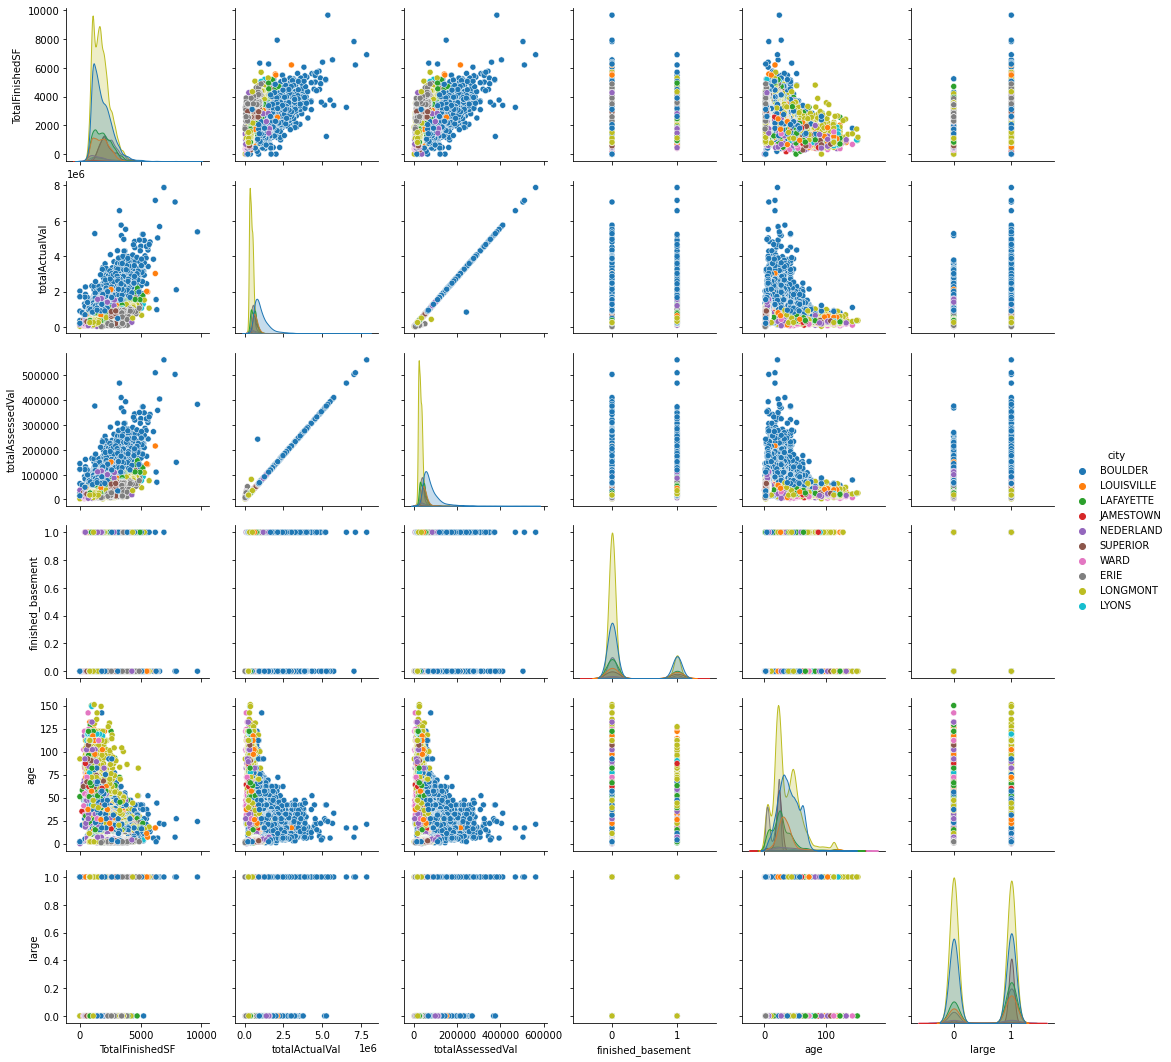

In [ ]:
# Your Code Here
import seaborn as sns

sns.pairplot(data=valuation_df, hue = 'city')

#between 1 story and multiple story single family residential buildings it seems that multiple stories have more
#living area and value which obviously makes sense since these homes are bigger. It also seems that the larger
#the living area and the newer the building both increase the value of the building. It also seems that the
#average age of these buildings in boulder county are around 25 years old. There seems to be some outliers in
#the data however, none of them seems to stray to far off from what's expected, since this is the case I won't
#be removing any.

<AxesSubplot:xlabel='city'>

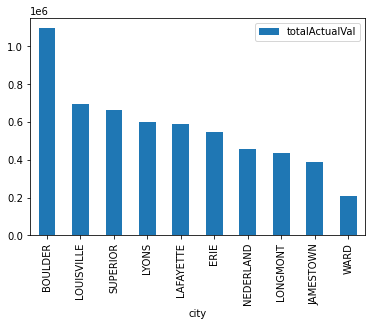

In [ ]:
#looking at if location has an effect on valuation

valuation_df.pivot_table(index = 'city', values = 'totalActualVal', aggfunc = 'mean').sort_values(by='totalActualVal', ascending=False).plot(kind = 'bar')

#as can be shown in the bar chart below, Boulder on average has the highest valued homes while, Ward, has the least
#valuable homes. All the other cities listed in the dataset are also listed below as well.

## Part II: Algorithmic Thinking

### Objective
Our goal is to predict the value of a new single-family property given comparable sales data.  One way we might estimate the value of a home is to look at the value of *k*-similar nearby homes that have recently sold.  The average sales price of those *k* homes could then be used as the predicted valuation for our new home.  This process is effectively how the K-Nearest Neighbor Algorithm (KNN) works for regression problems.

KNN is considered a supervised machine learning algorithm that can be used to solve both classification and regression problems.  As shown above, we can be used to solve nonparametric regression problems such as predicting the price of a new home based on *similar* nearby homes.

Recall the central factors used for property valuation:

- Location
- Living Area (SQFT)
- Age of the Home
- Finished Basement

### 2.0 Read and Prepare the Sales Data

Tasks:
- Load the sales.csv
- Keep only qualified sales (sales.sales_cd == 'Q') and sales.price > 0.
- Keep only sales in the last 5 years (01/01/2015 and 12/31/2020)
- Join "sales" with the necessary data frames to add the following columns
    - nh, this is the neighborhood number that must be used to identify comparable sales by location.
    - totalActualVal
    - builtYear
    - EffectiveYear
    - TotalFinishedSF
    - A boolean flag (1/0) for if the basement is finished that you will need to create

In [ ]:
sales

,strap,deedNum,Tdate,sales_cd,deed_type,price,status_cd,nh,builtYear,EffectiveYear,TotalFinishedSF,bsmtTypeDscr,totalActualVal,finished_basement
0,R0000013,3490566,2015-12-14,Q,WJ,1315000.0,A,120.0,1973,1995,3111,SUBTERRANEAN BASEMENT UNFINISHED AREA,1838000,0
1,R0000017,3686840,2018-11-20,Q,WD,728500.0,A,120.0,1968,1985,1213,SUBTERRANEAN BASEMENT FINISHED AREA,876000,1
2,R0000026,3575976,2017-02-15,Q,WD,1240000.0,A,102.0,1891,1983,3022,SUBTERRANEAN BASEMENT FINISHED AREA,1715000,1
3,R0000028,3672204,2018-08-15,Q,WD,2350000.0,A,103.0,1945,1985,1905,WALK-OUT BASEMENT FINISHED AREA,2225500,1
4,R0000038,3458700,2015-06-15,Q,WD,569900.0,A,109.0,1900,1960,660,0,668000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11754,R0612351,3804136,2020-08-03,Q,SJ,915000.0,A,157.0,2019,2019,2582,0,870300,0
11755,R0612352,3768876,2020-02-28,Q,SJ,1013500.0,A,157.0,2019,2019,2946,0,903600,0
11756,R0612879,3796977,2020-06-25,Q,WD,360000.0,A,960.0,1944,1980,902,0,410600,0
11757,R0612880,3794829,2020-06-17,Q,WJ,363000.0,A,960.0,1958,1980,1230,0,471700,0


In [ ]:
# Your Code Here

#keeping only qualified sales
sales = pd.read_csv('sales.csv', parse_dates=['Tdate'])
sales = sales[(sales['sales_cd'] == 'Q') & (sales['price'] > 0)]

#Keep only sales in the last 5 years (01/01/2015 and 12/31/2020)
mask = (sales['Tdate'] >= '2015-01-01') & (sales['Tdate'] <= '2020-12-31')
sales = sales.loc[mask]

sales.info()
addresses.info()


#creating data frame
add = addresses[['strap','nh']]
build = buildings[['strap','builtYear','EffectiveYear','TotalFinishedSF','bsmtTypeDscr']]
val = values[['strap','totalActualVal']]


sales = sales.merge(add, on = 'strap')
sales = sales.merge(build, on = 'strap')
sales = sales.merge(val, on = 'strap')

#creating boolean column for if basement is finished
sales['finished_basement'] = np.where(sales.bsmtTypeDscr.str.lower().str.strip().str.contains(r'\bfinished') == True, 1,0)
sales = sales.drop('bsmtTypeDscr', axis = 1)
sales.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11759 entries, 26 to 221106
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   strap      11759 non-null  object        
 1   deedNum    11759 non-null  object        
 2   Tdate      11759 non-null  datetime64[ns]
 3   sales_cd   11759 non-null  object        
 4   deed_type  11759 non-null  object        
 5   price      11759 non-null  float64       
 6   status_cd  11759 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 734.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41961 entries, 0 to 41960
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   strap      41961 non-null  object 
 1   str_pfx    4011 non-null   object 
 2   str_num    41961 non-null  float64
 3   str        41961 non-null  object 
 4   str_sfx    41345 non-null  object 
 5   

,strap,deedNum,Tdate,sales_cd,deed_type,price,status_cd,nh,builtYear,EffectiveYear,TotalFinishedSF,totalActualVal,finished_basement
0,R0000013,3490566,2015-12-14,Q,WJ,1315000.0,A,120.0,1973,1995,3111,1838000,0
1,R0000017,3686840,2018-11-20,Q,WD,728500.0,A,120.0,1968,1985,1213,876000,1
2,R0000026,3575976,2017-02-15,Q,WD,1240000.0,A,102.0,1891,1983,3022,1715000,1
3,R0000028,3672204,2018-08-15,Q,WD,2350000.0,A,103.0,1945,1985,1905,2225500,1
4,R0000038,3458700,2015-06-15,Q,WD,569900.0,A,109.0,1900,1960,660,668000,0


### 2.1 Property Valuation using KNN

Tasks:
- Complete the below function **predict_knn()** so that it finds the k-most similar sales properties in the appraisal neighborhood (nh) and returns the average sale price for those *k* properties as the predicted value (y_hat).


#### KNN Regression Pseudo Code
Given a new data point:
1. Calculate the Euclidean distance between the new data point and all known datapoints in the dataset.
2. Select the *k* closest datapoints.
3. Average the target variable for the *k* closest data points.

Euclidean Distance formula for 3-dimenstions where p_1 and q_1 is finished_sqft, p2 and q_2 is home_age, and p3 and q_3 is finished_basement:

$$d(p,q)=\sqrt{(p_1-q_1)^2 + (p_2-q_2)^2 + (p_3-q_3)^2}$$.

In [ ]:
#creating age with subtracting effective year from 2022 since that is the most recent effective year in entire data set
sales['age'] = 2020 - sales.EffectiveYear

,strap,deedNum,Tdate,sales_cd,deed_type,price,status_cd,nh,builtYear,EffectiveYear,TotalFinishedSF,totalActualVal,finished_basement,age
1625,R0026982,3662269,2018-06-18,Q,WD,80000.0,A,903.0,1961,1961,150,80301,0,59
778,R0011305,03803922,2020-07-29,Q,WJ,849000.0,A,146.0,2002,2002,193,809800,0,18
1660,R0028945,3674653,2018-08-30,Q,WJ,112000.0,A,910.0,1969,1969,196,125500,0,51


In [ ]:
# This function is incomplete, fix it!
def predict_knn(sales, k=3, nh=200, finished_sqft=1500, home_age=5, finished_basement=False):

    # Filter down to our sales data to the provided neighborhood number, nh.
    if sum(sales.nh == nh) > 0:
        sales = sales[sales.nh == float(nh)]

    # Calculate the Euclidean Distance for finished_sqft, home_age, and finished_basement for every sale in our nh.

        sales['euc_dis'] = ((sales.TotalFinishedSF - finished_sqft)^2 + (sales.age - home_age)^2 + (sales.finished_basement - finished_basement)^2)**1/2
    # Keep only the *k* closeset rows and take the mean of our target variable "price"
        sales = sales.nsmallest(k, 'euc_dis')
        y_hat = sales['price'].mean()


        return y_hat
    else:
        print('Not a valid neighborhood number')


In [ ]:
# Validate your function works for a new home in nh 200 that is 1500 sqft, 5 years old, and does not have a finished basement.
predict_knn(sales, k=3, nh=200, finished_sqft=1500, home_age=5, finished_basement=0)

Not a valid neighborhood number


### 2.2 Test your KNN function.
Selecting 10 or more existing home valuations at random and compare the results of predict_knn() to the Accessors's provided valuation (In values.csv, the totalActualVal column).  How do our predictions perform relative to the Accessor's valuation as we try different values of *k*?

In [ ]:
#ten random
sales.sample(n = 10, random_state=23)

,strap,deedNum,Tdate,sales_cd,deed_type,price,status_cd,nh,builtYear,EffectiveYear,TotalFinishedSF,totalActualVal,finished_basement,age
9856,R0603285,3524231,2016-06-13,Q,SW,417400.0,A,205.0,2015,2015,2265,506400,0,5
2451,R0040838,3759861,2019-12-17,Q,WJ,380000.0,A,203.0,1965,1965,1556,339300,0,55
2777,R0043115,3582008,2017-03-22,Q,WJ,322000.0,A,205.0,1965,1998,1631,369100,0,22
3741,R0052754,3629350,2017-12-01,Q,WJ,714000.0,A,825.0,1979,1987,2240,743090,0,33
5344,R0096250,3762840,2020-01-23,Q,SJ,610000.0,A,223.0,1992,1994,3320,625100,1,26
2969,R0044539,3539652,2016-08-24,Q,WJ,282500.0,A,203.0,1943,2001,848,350800,0,19
5032,R0087326,3838018,2020-11-30,Q,WD,345000.0,A,202.0,1983,1996,896,363500,0,24
5181,R0092090,3477801,2015-10-05,Q,WJ,335000.0,A,410.0,1983,1987,1192,471000,0,33
7350,R0126454,3463173,2015-07-20,Q,WJ,453300.0,A,440.0,1998,2006,2358,600400,0,14
6439,R0116267,3589712,2017-04-24,Q,WJ,775000.0,A,155.0,1996,2002,2602,818300,1,18


In [ ]:
# Your code here and thoughts here.

predict_knn(sales, k=1, nh=205, finished_sqft=2265, home_age=5, finished_basement=0) - 506400 #off by -186400.0

predict_knn(sales, k=2, nh=203, finished_sqft=1556, home_age=55, finished_basement=0) - 339300 #off by 172550.0

predict_knn(sales, k=3, nh=205, finished_sqft=1631, home_age=22, finished_basement=0) - 369100 #off by 476233.33

predict_knn(sales, k=4, nh=825, finished_sqft=2240, home_age=33, finished_basement=0) - 743090 #off by 88160.0

predict_knn(sales, k=5, nh=223, finished_sqft=3320, home_age=26, finished_basement=1) - 625100 #off by -341500.0

predict_knn(sales, k=6, nh=203, finished_sqft=848, home_age=19, finished_basement=0) - 350800 #off by 178116.67

predict_knn(sales, k=7, nh=202, finished_sqft=896, home_age=24, finished_basement=0) - 363500 #off by 57471.43

predict_knn(sales, k=8, nh=410, finished_sqft=1192, home_age=33, finished_basement=0) - 471000 #off by 376375.0

predict_knn(sales, k=9, nh=440, finished_sqft=2358, home_age=14, finished_basement=0) - 600400 #off by 313833.33

predict_knn(sales, k=10, nh=155, finished_sqft=2602, home_age=18, finished_basement=1) - 818300 #off by -308260.0

#it seems that there is a sweet spot for each of these predictions when picking a value of K.
#when playing around with it I couldn't seem to find a common trend between different values of K
#and the accuracy of the predictor. You would think that the more values of K the more accurate it is
#however, it's more based off of the amount of houses in the neighborhood, becuase if you have a lot of houses
#in the same nh then there will be more variation, leading to most likely a more off prediction.

<ipython-input-84-b35196fde511>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['euc_dis'] = ((sales.TotalFinishedSF - finished_sqft)^2 + (sales.age - home_age)^2 + (sales.finished_basement - finished_basement)^2)**1/2


-186400.0

<ipython-input-84-b35196fde511>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['euc_dis'] = ((sales.TotalFinishedSF - finished_sqft)^2 + (sales.age - home_age)^2 + (sales.finished_basement - finished_basement)^2)**1/2


172550.0

<ipython-input-84-b35196fde511>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['euc_dis'] = ((sales.TotalFinishedSF - finished_sqft)^2 + (sales.age - home_age)^2 + (sales.finished_basement - finished_basement)^2)**1/2


476233.3333333334

<ipython-input-84-b35196fde511>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['euc_dis'] = ((sales.TotalFinishedSF - finished_sqft)^2 + (sales.age - home_age)^2 + (sales.finished_basement - finished_basement)^2)**1/2


88160.0

<ipython-input-84-b35196fde511>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['euc_dis'] = ((sales.TotalFinishedSF - finished_sqft)^2 + (sales.age - home_age)^2 + (sales.finished_basement - finished_basement)^2)**1/2


-341500.0

<ipython-input-84-b35196fde511>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['euc_dis'] = ((sales.TotalFinishedSF - finished_sqft)^2 + (sales.age - home_age)^2 + (sales.finished_basement - finished_basement)^2)**1/2


178116.66666666663

<ipython-input-84-b35196fde511>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['euc_dis'] = ((sales.TotalFinishedSF - finished_sqft)^2 + (sales.age - home_age)^2 + (sales.finished_basement - finished_basement)^2)**1/2


57471.42857142858

<ipython-input-84-b35196fde511>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['euc_dis'] = ((sales.TotalFinishedSF - finished_sqft)^2 + (sales.age - home_age)^2 + (sales.finished_basement - finished_basement)^2)**1/2


376375.0

<ipython-input-84-b35196fde511>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['euc_dis'] = ((sales.TotalFinishedSF - finished_sqft)^2 + (sales.age - home_age)^2 + (sales.finished_basement - finished_basement)^2)**1/2


313833.3333333334

<ipython-input-84-b35196fde511>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['euc_dis'] = ((sales.TotalFinishedSF - finished_sqft)^2 + (sales.age - home_age)^2 + (sales.finished_basement - finished_basement)^2)**1/2


-308260.0

## Part III: Ethics Review

Whenever we are modeling our data, it's critical that we take time to consider the impact our algorithms have on people's lives.  

### 3.0
Writing a short paragraph that addresses the following questions.

1. Describe one possible source of bias that exist might exist in this dataset and impact our estimated valuation?
2. What potential harm could arise due to how our knn regression algorithm works?  For example, what if *k* is too low or too high?  What impact can outliers have?  Would it make sense to normalize (e.g. standardize our values between 0 and 1) for our data points (sqft, age, basement) before calculating Euclidean Distance?
3. Should we have an appeal process for people that may be harmed by the results of our model?



#### Answer

https://www.bloomberg.com/news/articles/2021-03-03/appraisers-acknowledge-bias-in-home-valuations

When researching on potential biases on home evaluations one I kept stumbling upon was racial bias. Our dataset didn't have a race of the families living in the household or the race of the apraiser, and research shows that this can actually impact the value of a house positvely or negatively. The link to this article is above. A potential harm of how our knn regression alogrithim is due to the number of homes in nh and the value of K. I mentioned this in the previous problem, but each nh has differing number of homes, so you could potentially have a higher K than the number of homes in the same nh, which could lead to an error or a miscalculation. Also if there are outliers this could really screw up our calculation, especially if K is small, and an outlier is in the selected K. This would make our prediction a lot smaller or even larger than expected.Normalizing the data could potentially fix this problem, however in my opinion that's not how it works in the real world, and in my opionion outliers should be included unless they are very extreme in order to capture a more realistic value. However, if you wanted a close prediction with only including non-outliers, that would work for a small sample in specific situations. Also you couldn't scale having a finished basement since it's a value of 0 or 1, and it would just return 0 and 1 of what it was already. I think having an appeal process would be a great idea, especially if we are considering ethics. It would be a lot more work on our end but would make us look a lot more reliable and trustworthy, therefore leading to more people coming to us for home valuations.